In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium as fol

In [2]:
# Read the CSV file for sol 4471 and display the first five rows of oxide data.
df = pd.read_csv("data/apb_794397220rwp44711132670_______p1.csv",skipinitialspace = True, quotechar='"')
df.head()



,oxide,APXS analysis ver 2,statistical uncertainty (precision)
0,Na2O,1.88,0.14
1,MgO,9.16,0.25
2,Al2O3,6.62,0.19
3,SiO2,37.43,0.43
4,P2O5,0.95,0.07


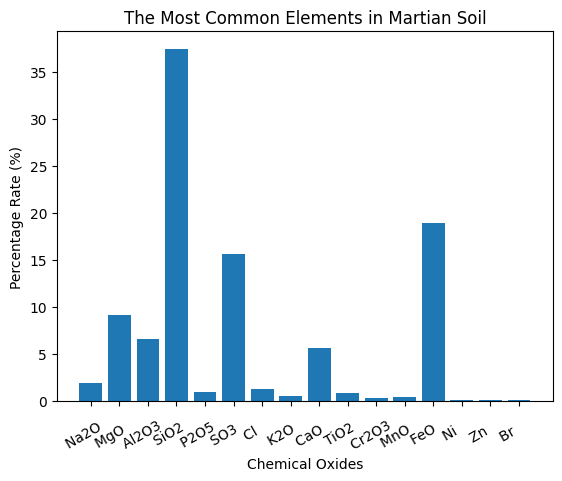

In [3]:
# Use Matplotlib to create a bar chart.
plt.bar(df['oxide'],df['APXS analysis ver 2'])
plt.xlabel("Chemical Oxides")
plt.ylabel("Percentage Rate (%)")
plt.title("The Most Common Elements in Martian Soil")
plt.xticks(rotation = 30)
plt.show()

In [4]:
# Read the CSV file for sol 48 and display the first five rows of oxide data.
df_sol46 = pd.read_csv("data/apa_401715030rwp00480042100_______p1.csv",skipinitialspace = True, quotechar='"')
df_sol46.head()

,oxide,APXS analysis ver 2,statistical uncertainty (precision)
0,Na2O,6.59,0.20
1,MgO,4.60,0.17
2,Al2O3,14.65,0.38
3,SiO2,48.87,0.54
4,P2O5,0.85,0.05


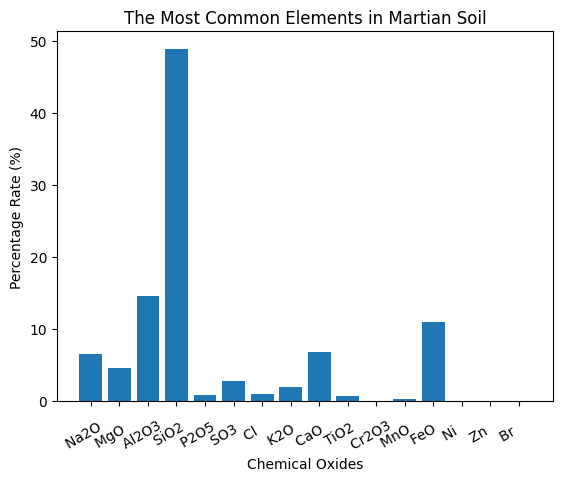

In [5]:
# Use Matplotlib to create a bar chart.
plt.bar(df_sol46['oxide'],df_sol46['APXS analysis ver 2'])
plt.xlabel("Chemical Oxides")
plt.ylabel("Percentage Rate (%)")
plt.title("The Most Common Elements in Martian Soil")
plt.xticks(rotation = 30)
plt.show()

In [6]:
# Calculate the differences between the two sols and create a scatter plot.
differences = df['APXS analysis ver 2'] - df_sol46['APXS analysis ver 2']
print(differences)

0     -4.7100
1      4.5600
2     -8.0300
3    -11.4400
4      0.1000
5     12.8300
6      0.3500
7     -1.3400
8     -1.1600
9      0.1100
10     0.3200
11     0.1600
12     7.9500
13     0.0691
14     0.0788
15     0.1147
Name: APXS analysis ver 2, dtype: float64


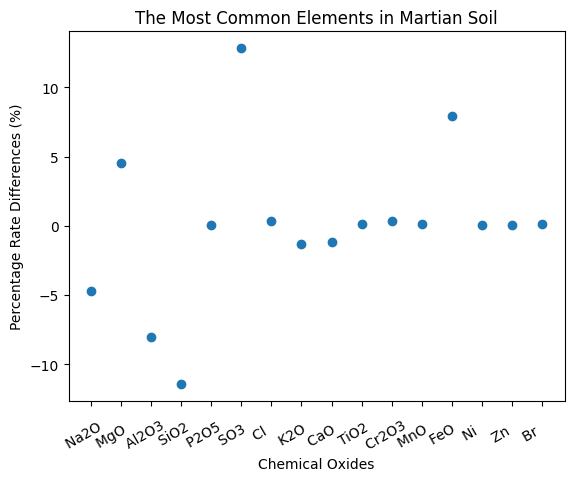

In [7]:
plt.scatter(df['oxide'],differences)
plt.xlabel("Chemical Oxides")
plt.ylabel("Percentage Rate Differences (%)")
plt.title("The Most Common Elements in Martian Soil")
plt.xticks(rotation = 30)
plt.show()

In [8]:
# Read the CSV file containing the coordinates and clean the data.
df_local = pd.read_csv("localized_interp.csv")
df_local.drop_duplicates(subset=['sol'], inplace=True)

In [9]:
# Define a function that reads a file name and extracts the corresponding "sol" number.
def get_sol_from_filename(txt_to_sol):
    split_text = txt_to_sol.split('_')
    second_term = split_text[1]
    split_text_2 = second_term.split('p')
    second_term_2 = split_text_2[1]
    final_str_text = second_term_2[0:4]
    final_int_text = int(final_str_text)
    return final_int_text

a = get_sol_from_filename("apa_401715030rwp00480042100_______p1.csv")
print(a)

48


In [10]:
# Create a for loop to iterate through the data files, read each sol's CSV, and combine them into a single DataFrame.
import os
all_dfs = []
for file_name in os.listdir('data'):
    full_path = os.path.join('data', file_name)
    
    df_sol = pd.read_csv(full_path,skipinitialspace = True, quotechar='"')
    df_sol['sol'] = get_sol_from_filename(file_name)
    
    df_cleaned  = pd.pivot_table(df_sol, values = 'APXS analysis ver 2', index = 'sol', columns = 'oxide')
    df_cleaned  = df_cleaned .reset_index()
    df_cleaned  = df_cleaned .rename_axis(None, axis=1) 
    all_dfs.append(df_cleaned )

final_df = pd.concat(all_dfs, ignore_index=True)
final_df.head(10)


,sol,Al2O3,Br,CaO,Cl,Cr2O3,FeO,K2O,MgO,MnO,Na2O,Ni,P2O5,SO3,SiO2,TiO2,Zn
0,48,14.65,0.0094,6.78,0.95,0.04,10.94,1.89,4.60,0.23,6.59,0.0061,0.85,2.81,48.87,0.73,0.0319
1,538,7.38,0.0733,5.52,1.74,0.40,22.82,0.88,8.77,0.52,2.34,0.0395,0.90,8.43,39.06,0.94,0.1067
2,1066,5.45,0.0060,2.99,0.28,0.08,4.94,0.99,0.72,0.08,2.01,0.0120,1.29,4.85,74.43,1.66,0.0294
3,1519,9.66,0.0022,7.39,0.49,0.49,19.03,0.48,9.11,0.41,2.61,0.0493,0.79,2.97,45.54,0.91,0.0209
4,2014,9.80,0.0056,3.87,0.74,0.30,18.10,1.03,5.05,0.27,2.64,0.0921,0.87,4.94,51.08,1.03,0.0952
5,2559,8.67,0.0168,6.71,0.72,0.56,22.10,0.48,8.78,0.40,2.58,0.0727,0.86,6.20,40.62,1.14,0.0467
6,3015,8.42,0.0152,3.84,1.15,0.31,20.92,0.89,6.07,0.32,2.25,0.0844,1.95,6.20,46.21,1.11,0.1746
7,3626,7.38,0.0715,4.61,1.82,0.18,17.70,0.56,9.37,0.23,2.36,0.0920,0.97,14.62,38.94,0.85,0.0900
8,4028,7.11,0.0009,5.25,1.53,0.35,21.52,0.62,9.65,0.37,2.41,0.0592,0.72,14.07,35.16,0.99,0.0915
9,4471,6.62,0.1241,5.62,1.30,0.36,18.89,0.55,9.16,0.39,1.88,0.0752,0.95,15.64,37.43,0.84,0.1107


In [11]:
# Merge the final DataFrame with the DataFrame containing the coordinates.
combined_df = pd.merge(df_local, final_df, on='sol', how='inner')
combined_df.head(10)

,frame,site,drive,pose,landing_x,landing_y,landing_z,northing,easting,planetocentric_latitude,...,K2O,MgO,MnO,Na2O,Ni,P2O5,SO3,SiO2,TiO2,Zn
0,ROVER,4,2106,-1,-56.809,219.395,6.974,-272096.077,8147030.618,-4.590425,...,1.89,4.60,0.23,6.59,0.0061,0.85,2.81,48.87,0.73,0.0319
1,ROVER,26,372,-1,-2200.427,-2047.254,-13.086,-274239.695,8144763.969,-4.626590,...,0.88,8.77,0.52,2.34,0.0395,0.90,8.43,39.06,0.94,0.1067
2,ROVER,48,2548,-1,-4656.697,-4228.422,-54.094,-276695.965,8142582.801,-4.668028,...,0.99,0.72,0.08,2.01,0.0120,1.29,4.85,74.43,1.66,0.0294
3,ROVER,59,2248,-1,-6889.203,-5066.288,-159.421,-278928.471,8141744.935,-4.705692,...,0.48,9.11,0.41,2.61,0.0493,0.79,2.97,45.54,0.91,0.0209
4,ROVER,69,1390,-1,-8050.802,-3561.647,-345.644,-280090.070,8143249.576,-4.725289,...,1.03,5.05,0.27,2.64,0.0921,0.87,4.94,51.08,1.03,0.0952
5,ROVER,77,76,-1,-8384.164,-3446.229,-371.386,-280423.432,8143364.994,-4.730913,...,0.48,8.78,0.40,2.58,0.0727,0.86,6.20,40.62,1.14,0.0467
6,ROVER,85,1814,-1,-8561.388,-2325.418,-421.995,-280600.656,8144485.805,-4.733903,...,0.89,6.07,0.32,2.25,0.0844,1.95,6.20,46.21,1.11,0.1746
7,ROVER,97,1740,-1,-10154.334,-2510.626,-621.246,-282193.602,8144300.597,-4.760777,...,0.56,9.37,0.23,2.36,0.0920,0.97,14.62,38.94,0.85,0.0900
8,ROVER,105,424,-1,-11084.817,-2197.898,-736.716,-283124.085,8144613.325,-4.776475,...,0.62,9.65,0.37,2.41,0.0592,0.72,14.07,35.16,0.99,0.0915
9,ROVER,113,2676,-1,-11898.542,-2971.012,-791.651,-283937.810,8143840.211,-4.790203,...,0.55,9.16,0.39,1.88,0.0752,0.95,15.64,37.43,0.84,0.1107


In [12]:
print(combined_df.columns)


Index(['frame', 'site', 'drive', 'pose', 'landing_x', 'landing_y', 'landing_z',
       'northing', 'easting', 'planetocentric_latitude',
       'planetodetic_latitude', 'longitude', 'elevation', 'map_pixel_line',
       'map_pixel_sample', 'dem_pixel_line', 'dem_pixel_sample', 'roll',
       'pitch', 'yaw', 'quat_s', 'quat_v1', 'quat_v2', 'quat_v3', 'sclk',
       'sol', 'Al2O3   ', 'Br      ', 'CaO     ', 'Cl      ', 'Cr2O3   ',
       'FeO     ', 'K2O     ', 'MgO     ', 'MnO     ', 'Na2O    ', 'Ni      ',
       'P2O5    ', 'SO3     ', 'SiO2    ', 'TiO2    ', 'Zn      '],
      dtype='object')


In [13]:
import plotly.graph_objects as go
import pandas as pd
from PIL import Image
import numpy as np

# The filename of your local image.
img_filename = "gale_crater.jpg" 

# --- Image and Coordinate Information ---
img_lon_range = [137.11500, 137.71500]# West longitude, East longitude
img_lat_range = [-4.92700, -4.22600]# South latitude, North latitude
# Get image dimensions from the file
try:
    with Image.open(img_filename) as img:
        img_width, img_height = img.size
except FileNotFoundError:
    print("Error: Image file not found. Please check the file name and path.")
    img_width = 1000
    img_height = 1000

# --- Data Transformation ---
# Convert geographic coordinates (lat/lon) to image pixel coordinates (x/y)
combined_df['x_pixels'] = (combined_df['longitude'] - img_lon_range[0]) / (img_lon_range[1] - img_lon_range[0]) * img_width
combined_df['y_pixels'] = (combined_df['planetodetic_latitude'] - img_lat_range[0]) / (img_lat_range[1] - img_lat_range[0]) * img_height

# --- Plotly Visualization ---
fig = go.Figure()

# Add the image as a background layer
fig.add_layout_image(
    dict(
        source=Image.open(img_filename),
        xref="x",
        yref="y",
        x=0,
        y=img_height, 
        sizex=img_width,
        sizey=img_height,
        sizing="stretch",
        layer="below"
    )
)

# Add the data points as a scatter plot
fig.add_trace(go.Scatter(
    x=combined_df['x_pixels'],
    y=combined_df['y_pixels'],
    mode='markers',
    marker_color="cyan",
    marker_size=10,
    name="Curiosity Measurements",
    hovertemplate="<b>Latitude:</b> %{customdata[0]:.4f}<br>" +
                   "<b>Longitude:</b> %{customdata[1]:.4f}<br>" +
                   "<b>Sol:</b> %{customdata[2]}<br>" +
                   "<br><b>Chemicals:</b><br>" +
                   "<b>Al2O3:</b> %{customdata[3]:.2f}<br>" +
                   "<b>Br:</b> %{customdata[4]:.2f}<br>" +
                   "<b>CaO:</b> %{customdata[5]:.2f}<br>" +
                   "<b>Cl:</b> %{customdata[6]:.2f}<br>" +
                   "<b>Cr2O3:</b> %{customdata[7]:.2f}<br>" +
                   "<b>FeO:</b> %{customdata[8]:.2f}<br>" +
                   "<b>K2O:</b> %{customdata[9]:.2f}<br>" +
                   "<b>MgO:</b> %{customdata[10]:.2f}<br>" +
                   "<b>MnO:</b> %{customdata[11]:.2f}<br>" +
                   "<b>Na2O:</b> %{customdata[12]:.2f}<br>" +
                   "<b>Ni:</b> %{customdata[13]:.2f}<br>" +
                   "<b>P2O5:</b> %{customdata[14]:.2f}<br>" +
                   "<b>SO3:</b> %{customdata[15]:.2f}<br>" +
                   "<b>SiO2:</b> %{customdata[16]:.2f}<br>" +
                   "<b>TiO2:</b> %{customdata[17]:.2f}<br>" +
                   "<b>Zn:</b> %{customdata[18]:.2f}" +
                   "<extra></extra>",
    customdata=combined_df[['planetodetic_latitude', 'longitude', 'sol', 'Al2O3   ', 'Br      ', 'CaO     ', 'Cl      ', 'Cr2O3   ', 'FeO     ', 'K2O     ', 'MgO     ', 'MnO     ', 'Na2O    ', 'Ni      ', 'P2O5    ', 'SO3     ', 'SiO2    ', 'TiO2    ', 'Zn      ']]
))

# Update plot layout for a clean look
fig.update_layout(
    title="Curiosity Rover's Path and Discoveries in Gale Crater",
    xaxis=dict(showgrid=False, range=[0, img_width]),
    yaxis=dict(showgrid=False, scaleanchor="x", scaleratio=1, range=[0, img_height]),
    width=img_width,
    height=img_height,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

# Show the interactive plot
fig.show()